## Testing CNN implentation with Keras

In [1]:
# Pathing Libraries
from pathlib import Path
import os
import os.path as op
import glob

# Image Libraries
import nibabel as nib
import numpy as np
import pandas as pd
import scipy.ndimage as ndi
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras


In [2]:
## Pathing
path = '../'

images_path = Path(path, 'data', 'images')
masks_path = Path(path, 'data', 'masks')
segs_path = Path(path, 'data', 'segs_refs')
metadata_path = Path(path, 'data', 'meta')

## Functions
def z_normalize(img_data, mask_data):
    # Ensure the mask is binary
    mask_data = np.where(mask_data > 0, 1, 0)

    # Apply the mask to the image
    masked_image_data = img_data * mask_data

    # Calculate the z-score of the masked image
    masked_image_data[mask_data==0] = stats.zscore(masked_image_data[mask_data==0])

    # Handle NaN values that might result from zscoring zero-valued elements
    masked_image_data = np.nan_to_num(masked_image_data)

    return masked_image_data


CC110033 24 MALE
CC110037 18 MALE
CC110045 24 FEMALE
CC110056 22 FEMALE
CC110062 20 MALE
CC110069 28 FEMALE
CC110087 28 FEMALE
CC110098 23 MALE
CC110101 23 MALE
CC110126 22 FEMALE
CC110174 25 FEMALE
CC110182 18 FEMALE
CC110187 25 FEMALE
CC110319 28 FEMALE
CC110411 25 MALE
CC110606 20 MALE
CC112141 29 MALE
CC120008 26 MALE
CC120049 28 MALE
CC120061 19 MALE
CC120065 25 FEMALE
CC120120 25 MALE
CC120123 19 FEMALE
CC120166 28 MALE
CC120182 26 MALE


KeyboardInterrupt: 

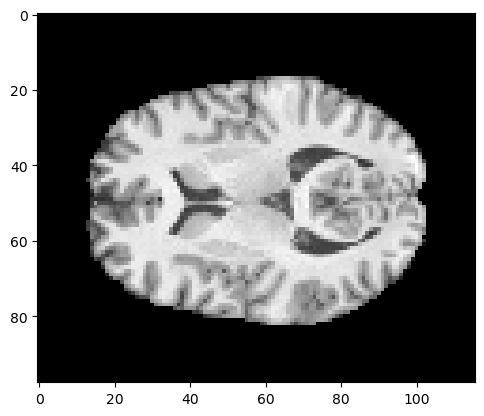

In [4]:
meta_data = pd.read_csv(Path(metadata_path, 'meta_data_all.csv'))

for subj, age, gender in zip(meta_data['subject_id'], meta_data['age'], meta_data['gender_text']): # ''gender_code'; 1= male, 2= female
    print(subj, age, gender)
    
    # Loading in Raw Image Data
    image = nib.load(op.join(images_path, 'sub-' + subj + '_T1w_unbiased' + '.nii.gz'))
    img_data = image.get_fdata()

    # Loading in Segmentation Data
    seg = nib.load(op.join(segs_path, 'sub-' + subj + '_T1w_seg.nii.gz'))
    seg_data = seg.get_fdata()

    # Loading in Mask Data
    mask = nib.load(op.join(masks_path, 'sub-' + subj + '_T1w_brain_mask' + '.nii.gz'))
    mask_data = mask.get_fdata()

    # Z-score Normalization
    z_img = z_normalize(img_data, mask_data)
    z_seg = z_normalize(seg_data, mask_data)


### Keras Implementation